# Convolutional neural networks

In class, we have briefly reviewed the idea of learning good features directly from data and went through the concept of convolutional neural networks along with few architectures.

Until recently, building convolutional neural networks was tough. There was no high-level tools for that, you would be required to understand all the internal mechanics of the model and its operations.

Today, due to the high-level tools such as Keras and TensorFlow, everybody can build a convolutional neural network and put it to work without diving deep into them. What used to be a one-month project became a few hours exercise.


In [0]:
import pickle
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils
from keras import utils as np_utils
from keras.layers.normalization import BatchNormalization
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
# !pip install fastai
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

## Loading the images

In [4]:
(train_images, train_labels), (cv_images, cv_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 495s 3us/step


In [5]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000


In [6]:
print(cv_images.shape)
print(len(cv_labels))

(10000, 32, 32, 3)
10000


In [7]:
print(train_labels[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [0]:
def print_model_results(model):
    score = model.evaluate(cv_images, Y_cv, batch_size=32, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(model.metrics_names)
    print(score)

In [0]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array)

In [0]:
def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', labels[example_index])

Label:  [6]


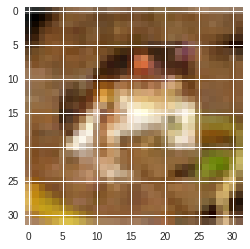

In [11]:
show_example(train_images, train_labels, example_index = 0)

Label:  [3]


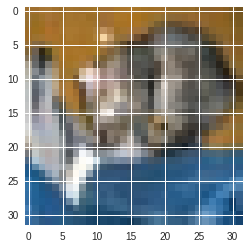

In [12]:
show_example(cv_images, cv_labels, example_index = 0)

## Building AlexNet

In 2012 a convolutional neural network called AlexNet won ImageNet competition. 

Go through an [original AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to investigate the architecture. Next, investigate the [basics of Keras](https://keras.io/#keras-the-python-deep-learning-library). We will use it with TensorFlow backend.

You are also encouraged to go through some CNN tutorial for Keras. There is a number of them online (for example, [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) or [this](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)).
Now, build AlexNex network with Keras for object recognition. Note that standard AlexNet works with 224x224 input images. The dataset you are going to use for this problem is 32x32.

## Training AlexNet

Use training set for training the network to recognize objects. You might want to use RMSProp optimizer to speed up the training.

Convolutional networks require a lot of computing power for training. Typical setup for training CNN is to use GPU, however, in this problem you are not required to do so. CPU will be fine as well.

If you are using CPU for this subproblem, training process might be slow. You can stop it manually as soon as you get meaningful results.

Report the results on the training and cross-validation sets. The report should contain the training logs.

In [13]:
# preprocessing input data

train_images = train_images.reshape(train_images.shape[0], 3, 32, 32)
cv_images = cv_images.reshape(cv_images.shape[0], 3, 32, 32)
print(train_images.shape)

train_images = train_images.astype('float32')
cv_images = cv_images.astype('float32')
train_images /= 255
cv_images /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(train_labels, 10)
Y_cv = np_utils.to_categorical(cv_labels, 10)
print (Y_train.shape)

(50000, 3, 32, 32)
(50000, 10)


In [0]:
epochs = 50
num_classes = 10
batch_size = 128

In [0]:
# https://github.com/jkh911208/cswithjames/blob/master/8_CIFAR10_alexnet.py
def create_alexnet_model(need_to_train = False):
    # AlexNet Define the Model
    model = Sequential()
    # model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
    # for original Alexnet
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', 
                     padding='same', 
                     input_shape=train_images.shape[1:], 
                     data_format = 'channels_first'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())

    model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    # Local Response normalization for Original Alexnet
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(4096, activation='tanh'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # print the model summary
    model.summary()

    # determine Loss function and Optimizer
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    if need_to_train == True:
        model.fit(train_images, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(cv_images, Y_cv),
                    shuffle=True)
#         save_model(model_name = 'alexnet_model', model = model)
    else:
        model = load_model('alexnet_model_not working', model)
    
    return model

   

In [16]:
alexnet_model = create_alexnet_model(need_to_train = True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 16, 16)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 96, 16, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 8, 16)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 8, 16)         64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 8, 256)        102656    
_________________________________________________________________
activation_2 (Activat

In [17]:
print_model_results(alexnet_model)

10000/10000 [==============================] - 5s 470us/step
Test loss: 1.5073077793121339
Test accuracy: 0.452
['loss', 'acc']
[1.5073077793121339, 0.452]


In [18]:
save_model('alexnet_model', model = alexnet_model)

Saved trained model at /content/gdrive/My Drive/Colab Notebooks/saved_models/alexnet_model 


## Improving AlexNet

As you can see, AlexNet does not work very well on such a small dataset. Recall what you have learned from this class to improve its performance. You can also take a look at the [Dropout technique](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) and its [implementation in Keras](https://keras.io/layers/core/#dropout). 

In [0]:
 def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocessing for new configuration
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4

In [0]:
# https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
def create_advanced_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    #data augmentation
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        )
    datagen.fit(x_train)

    #training
    batch_size = 64

    opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
    model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                        steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                        verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
    return model

In [38]:
advanced_model = create_advanced_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
__________

In [48]:
score = advanced_model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

10000/10000 [==============================] - 1s 141us/step
Test loss: 0.46111083664894104
Test accuracy: 0.885
[0.46111083664894104, 0.885]
